In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [6]:
df.shape

(4324, 9)

In [7]:
df.keys()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

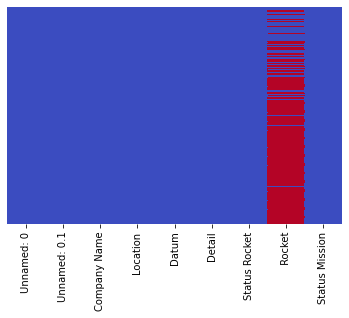

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [9]:
df.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [10]:
columns = [' Rocket', 'Unnamed: 0', 'Unnamed: 0.1']
df = df.drop(columns, axis =1)

In [11]:
df.shape

(4324, 6)

In [12]:
df['Country']=df['Location'].apply(lambda x:x.split(',')[-1])
df['Country']=df['Country'].str.strip()

df['Year']=df['Datum'].apply(lambda x:x.split(',')[1].split(' ')[1])
df['Year'] = pd.to_datetime(df['Year'])

df.drop('Datum', axis = 1)

,Company Name,Location,Detail,Status Rocket,Status Mission,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,USA,2020-01-01
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,China,2020-01-01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,Success,USA,2020-01-01
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,Kazakhstan,2020-01-01
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,Success,USA,2020-01-01
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,Failure,USA,1958-01-01
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,Success,USA,1958-01-01
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,Failure,USA,1957-01-01
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,Success,Kazakhstan,1957-01-01


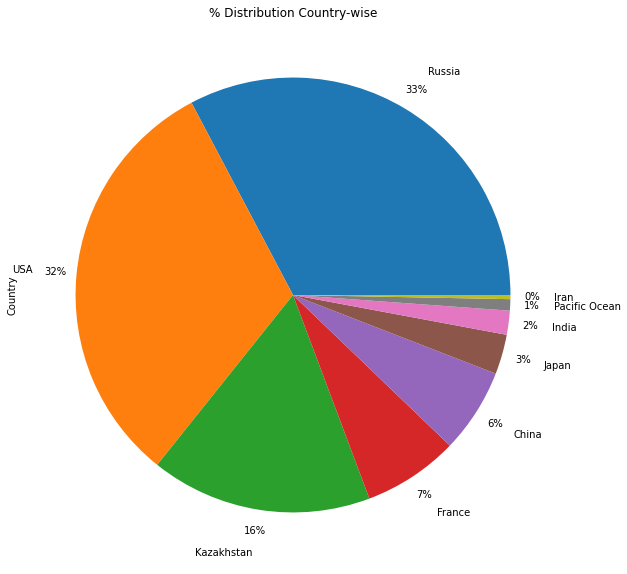

In [13]:
df['Country'].value_counts().head(9).plot.pie(figsize=(10,10),autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,
                                              title='% Distribution Country-wise')

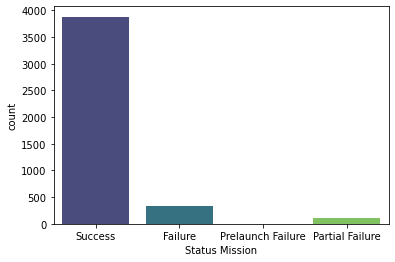

In [14]:
sns.countplot(x='Status Mission', data=df,palette='viridis')

In [15]:
data2 = df['Country'].unique()
data2

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

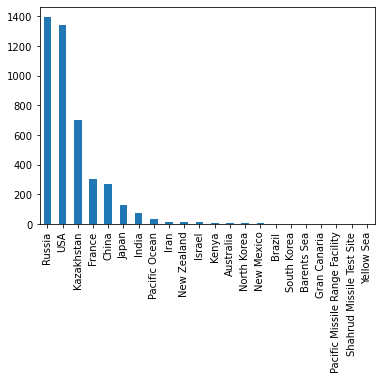

In [16]:
df['Country'].value_counts().plot(kind='bar'
                                         )

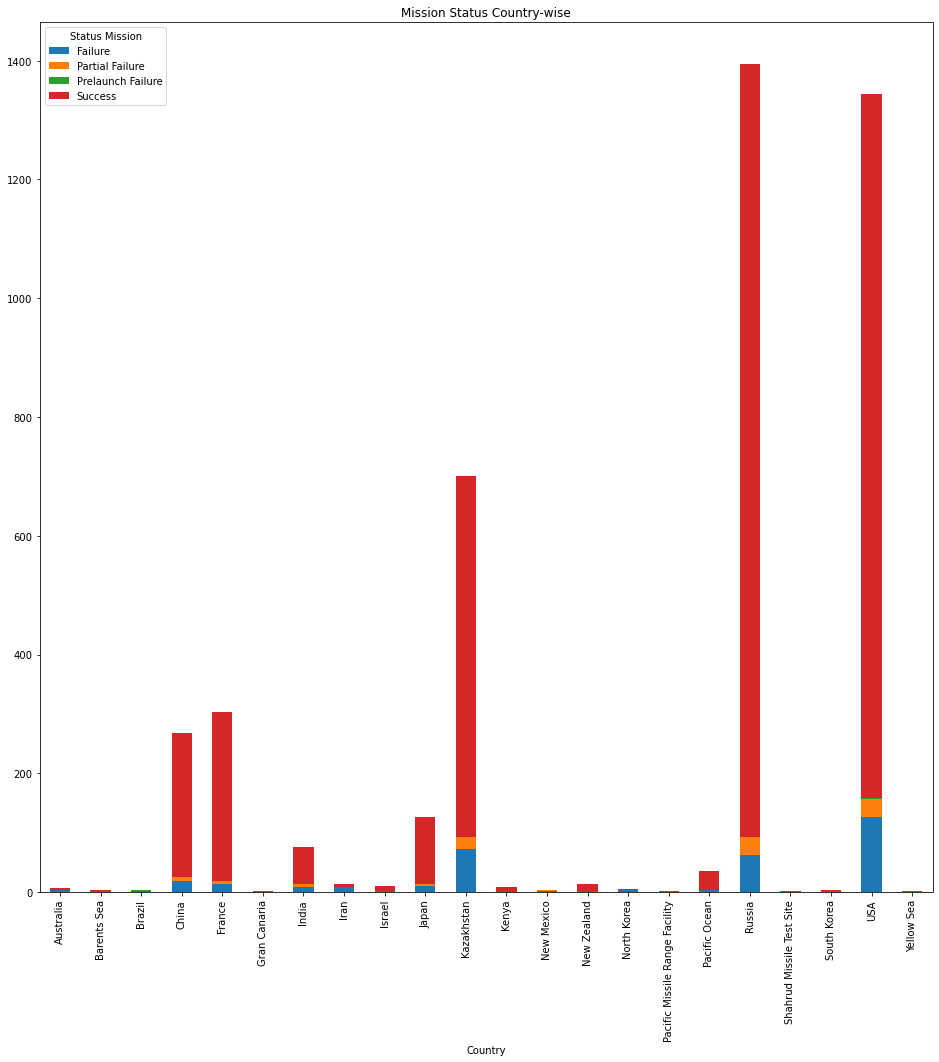

In [17]:
grouped = df.groupby(['Country','Status Mission'])['Country'].count().unstack()
grouped.sort_index(ascending=False)
grouped.plot(kind='bar', stacked=True, figsize=(16,16),title='Mission Status Country-wise')

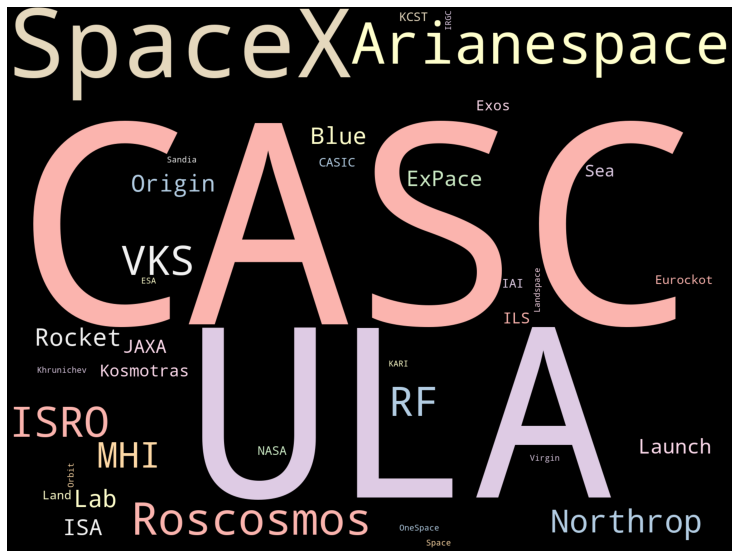

In [18]:
from wordcloud import WordCloud, STOPWORDS

df2 = df.query('Year > 2010')
company = " ".join(df2['Company Name'])
country = " ".join(df2['Country'])
#Defining a function to plot wordclouds
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(15, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
wordcloud = WordCloud(width = 1600, height = 1200, random_state=1, background_color='black', colormap='Pastel1', collocations=False,
                      stopwords = STOPWORDS).generate(company)
    
    
plot_cloud(wordcloud)